In [1]:
from mpl_toolkits.basemap import Basemap
from shapely.geometry import Point, MultiPoint
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as co
import networkx as nx
import numpy as np
import math

world = Basemap(
        projection='merc',
        ellps = 'WGS84',
        llcrnrlon=-155, 
        llcrnrlat=-60,
        urcrnrlon=180,
        urcrnrlat=75,
        lat_ts=0,
        resolution='i',
        suppress_ticks=True)

gtd_dataframe = pd.read_csv('Features pre-processed.csv', 
                            usecols=["eventid", "country", "region_txt", "longitude", "latitude", "iyear", "nkill", "gname",
                                     "weaptype1", "related"])

gtd_kills = gtd_dataframe[gtd_dataframe['nkill'] >= 30]

world_points = pd.Series(
                [Point(world(mapped_x, mapped_y)) 
                 for mapped_x, mapped_y in zip(gtd_kills['longitude'],
                                               gtd_kills['latitude'])])

world_repoints = MultiPoint(list(world_points.values)) 

world_country = gtd_kills['weaptype1']
cmap = plt.cm.jet

world_norm = co.Normalize(vmin=world_country.min(), vmax=world_country.max())
world_pointcolors = plt.cm.ScalarMappable(world_norm, cmap)
world_col = world_pointcolors.to_rgba(world_country)

In [2]:
# Defining edges between nodes with same gname
gtd_gname = gtd_kills["gname"]
n_nodes = gtd_gname.size

adj_gname = np.zeros((n_nodes, n_nodes))

for i in range(0, n_nodes):
    for j in range(0, n_nodes):
        if (gtd_gname[i] == gtd_gname[j] and i != j):
            adj_gname[i, j] = 1

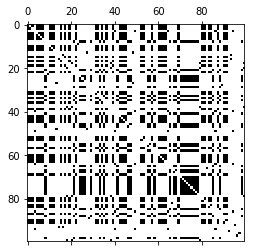

In [3]:
plt.spy(adj_gname[0:100, 0:100])

In [13]:
# Analysis of the ISIL Terrorist Group

gtd_isil = gtd_kills[gtd_dataframe["gname"] == "Islamic State of Iraq and the Levant (ISIL)"]
gtd_isil.reset_index(inplace=True)
del gtd_isil["index"]

isil_points = pd.Series(
                [Point(world(mapped_x, mapped_y)) 
                 for mapped_x, mapped_y in zip(gtd_isil['longitude'],
                                               gtd_isil['latitude'])])

world_repoints = MultiPoint(list(isil_points.values))

weapons_isil = gtd_isil["weaptype1"]
country_isil = gtd_isil["country"]
isil_nodes = gtd_isil.shape[0]

isil_adj = np.zeros((isil_nodes, isil_nodes))

for i in range(0, isil_nodes):
    for j in range(0, isil_nodes):
        if (i != j and country_isil[i] == country_isil[j]):
            isil_adj[i, j] = 1
            isil_adj[j, i] = 1
            

/Users/aminmekacher/miniconda3/envs/ntds_project/lib/python3.6/site-packages/ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


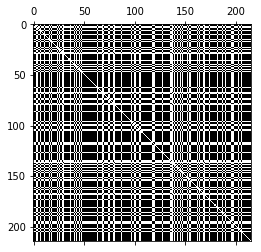

In [18]:
plt.spy(isil_adj)

world [22115662.564366102, 21914518.93117377] [12450987.81833287, 12682047.353008397]
world [22115662.564366102, 22037321.361400846] [12450987.81833287, 12694160.487712057]
world [22115662.564366102, 21919938.743222024] [12450987.81833287, 12662525.802709375]
world [22115662.564366102, 22193964.248912126] [12450987.81833287, 12274905.479817625]
world [22115662.564366102, 21831532.922455166] [12450987.81833287, 12416297.724495552]
world [22115662.564366102, 22057241.316361357] [12450987.81833287, 12686829.81782854]
world [22115662.564366102, 22057241.316361357] [12450987.81833287, 12686829.81782854]
world [22115662.564366102, 22057241.316361357] [12450987.81833287, 12686829.81782854]
world [22115662.564366102, 22057241.316361357] [12450987.81833287, 12686829.81782854]
world [22115662.564366102, 21979908.222704723] [12450987.81833287, 12689951.22807023]
world [22115662.564366102, 22069656.77916953] [12450987.81833287, 12659947.090097744]
world [22115662.564366102, 22057241.316361357] [12

KeyboardInterrupt: 

<Figure size 432x288 with 0 Axes>

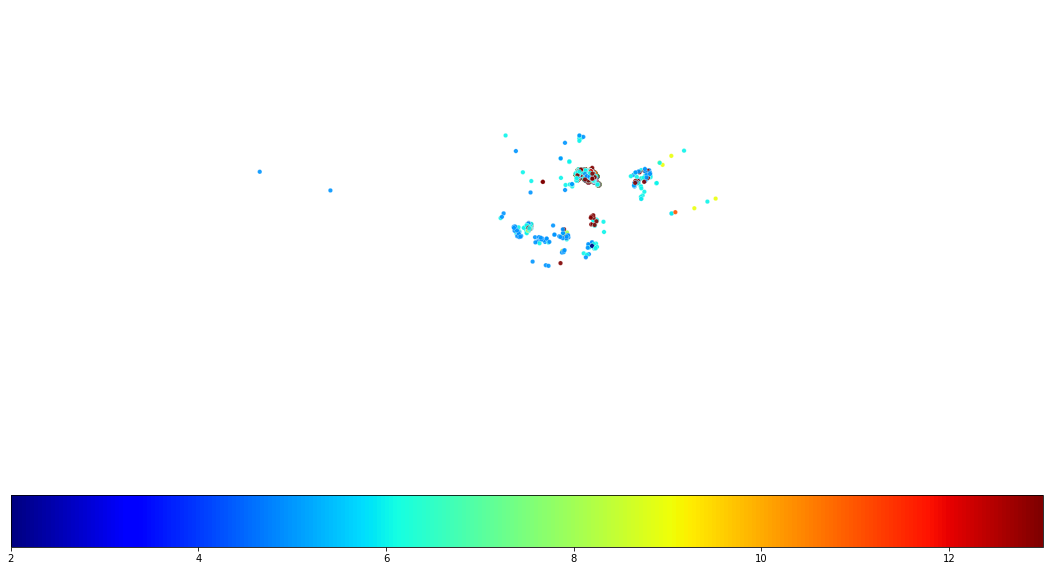

In [19]:
plt.clf()
fig = plt.figure()
ax = fig.add_subplot(111, facecolor='w', frame_on=False)
fig.set_size_inches(18.5, 10.5)

# Create a scatterplot on the map
dev = world.scatter(
            [geom.x for geom in world_points],
            [geom.y for geom in world_points],
            20, marker='o', lw=.25,
            facecolor=world_col, edgecolor='w',
            alpha=0.9,antialiased=True,
            zorder=3)

sm = cm.ScalarMappable(norm=world_norm, cmap=cmap)
sm.set_array([]) # can be an empty list
# ...
cb = fig.colorbar(sm, ax=ax, orientation='horizontal')

for i in range(0, isil_nodes):
    for j in range(0, isil_nodes):
        if isil_adj[i, j] == 1:
            lats = [isil_latitude[i], isil_latitude[j]]
            lons = [isil_longitude[i], isil_longitude[j]]
            mx, my = world(lons, lats)
            world.plot(mx, my, 'o-', markersize=5, linewidth=1) 

world.fillcontinents(color='#555555')